### Practice Day

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.linear_model

In [4]:
# C:\Users\anne1\Documents\DS_SM_15\lessons\lesson-20\code\dataset\loan_fullyfundeddata.xlsx

# loads in csv
df = pd.read_excel("loan_fullyfundeddata.xlsx",sheetname = 0)
df.head()

,customer_id,status,residence_rent_or_own,monthly_rent_amount,bank_account_direct_deposit,application_when,loan_duration,payment_ach,num_payments,address_zip,bank_routing_number,home_phone_type,monthly_income_amount,raw_l2c_score,raw_FICO_telecom,raw_FICO_retail,raw_FICO_bank_card,raw_FICO_money
0,9ece67d6c5,Approved,True,0,True,2010-10-16 14:06:00,3,True,6,84118,124001545,Mobile,1560,614,574,600,656,561
1,5c2c402094,Approved,True,0,False,2010-10-17 13:01:00,6,True,13,84062,124000054,Mobile,900,708,501,550,651,563
2,e6254cad30,Approved,True,620,True,2010-10-17 19:52:00,6,True,13,84119,124001545,Mobile,1434,687,522,561,661,598
3,49fb42f51d,Approved,False,785,False,2010-10-18 07:05:00,4,True,8,84405,124002971,Mobile,1600,616,560,552,634,591
4,195fbe5739,Approved,True,700,True,2010-10-19 10:58:00,4,True,8,84404,124002971,Mobile,1360,681,603,654,659,636


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 18 columns):
customer_id                    400 non-null object
status                         400 non-null object
residence_rent_or_own          400 non-null bool
monthly_rent_amount            400 non-null int64
bank_account_direct_deposit    400 non-null bool
application_when               400 non-null datetime64[ns]
loan_duration                  400 non-null int64
payment_ach                    400 non-null bool
num_payments                   400 non-null int64
address_zip                    400 non-null int64
bank_routing_number            400 non-null int64
home_phone_type                400 non-null object
monthly_income_amount          400 non-null int64
raw_l2c_score                  400 non-null int64
raw_FICO_telecom               400 non-null int64
raw_FICO_retail                400 non-null int64
raw_FICO_bank_card             400 non-null int64
raw_FICO_money                 400 n

In [8]:
df.describe()

,monthly_rent_amount,loan_duration,num_payments,address_zip,bank_routing_number,monthly_income_amount,raw_l2c_score,raw_FICO_telecom,raw_FICO_retail,raw_FICO_bank_card,raw_FICO_money
count,400.000000,400.000000,400.000000,400.000000,4.000000e+02,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000
mean,594.317500,5.860000,10.800000,82409.300000,1.815323e+08,2645.565000,606.55000,566.180000,592.242500,664.005000,602.565000
std,435.895893,1.511991,4.485007,6506.387121,9.981754e+07,1651.009577,108.37745,43.278519,51.673388,40.141042,30.989865
min,0.000000,2.000000,3.000000,57003.000000,1.240000e+04,300.000000,50.00000,222.000000,222.000000,222.000000,222.000000
25%,250.000000,5.000000,8.000000,84010.000000,1.240001e+08,1557.500000,544.00000,535.000000,553.000000,648.000000,587.750000
50%,577.500000,5.000000,10.000000,84084.000000,1.240030e+08,2397.000000,600.50000,566.000000,590.000000,671.000000,605.500000
75%,873.750000,8.000000,13.000000,84120.000000,3.240796e+08,3200.000000,671.75000,593.250000,632.000000,680.000000,621.000000
max,2100.000000,8.000000,34.000000,84790.000000,5.113005e+08,19392.000000,808.00000,698.000000,756.000000,796.000000,662.000000


In [10]:
columns = df.columns
for x in columns:
    print x

customer_id
status
residence_rent_or_own
monthly_rent_amount
bank_account_direct_deposit
application_when
loan_duration
payment_ach
num_payments
address_zip
bank_routing_number
home_phone_type
monthly_income_amount
raw_l2c_score
raw_FICO_telecom
raw_FICO_retail
raw_FICO_bank_card
raw_FICO_money


In [26]:
fico=pd.concat(
    [df['raw_l2c_score'], df['raw_FICO_telecom'],df['raw_FICO_retail'],df['raw_FICO_bank_card'],df['raw_FICO_money']])


df['fico_mean'] = fico.groupby(fico.index).mean()
df.fico_mean = df.fico_mean.astype(int)


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 19 columns):
customer_id                    400 non-null object
status                         400 non-null object
residence_rent_or_own          400 non-null bool
monthly_rent_amount            400 non-null int64
bank_account_direct_deposit    400 non-null bool
application_when               400 non-null datetime64[ns]
loan_duration                  400 non-null int64
payment_ach                    400 non-null bool
num_payments                   400 non-null int64
address_zip                    400 non-null int64
bank_routing_number            400 non-null int64
home_phone_type                400 non-null object
monthly_income_amount          400 non-null int64
raw_l2c_score                  400 non-null int64
raw_FICO_telecom               400 non-null int64
raw_FICO_retail                400 non-null int64
raw_FICO_bank_card             400 non-null int64
raw_FICO_money                 400 n

In [40]:
df2 = pd.read_excel("loan_fullyfundeddata.xlsx",sheetname = 1)
df2.head()

,customer_id,FullyFunded
0,9ece67d6c5,True
1,5c2c402094,True
2,e6254cad30,True
3,49fb42f51d,True
4,195fbe5739,True


In [43]:
result = pd.merge(df, df2, on='customer_id', how='outer')

In [44]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 20 columns):
customer_id                    400 non-null object
status                         400 non-null object
residence_rent_or_own          400 non-null bool
monthly_rent_amount            400 non-null int64
bank_account_direct_deposit    400 non-null bool
application_when               400 non-null datetime64[ns]
loan_duration                  400 non-null int64
payment_ach                    400 non-null bool
num_payments                   400 non-null int64
address_zip                    400 non-null int64
bank_routing_number            400 non-null int64
home_phone_type                400 non-null object
monthly_income_amount          400 non-null int64
raw_l2c_score                  400 non-null int64
raw_FICO_telecom               400 non-null int64
raw_FICO_retail                400 non-null int64
raw_FICO_bank_card             400 non-null int64
raw_FICO_money                 400 n

In [63]:
from sklearn.linear_model import LogisticRegression

X = result[['residence_rent_or_own','monthly_rent_amount','bank_account_direct_deposit',
        'loan_duration','num_payments','monthly_income_amount','fico_mean']].dropna()

loan_model = LogisticRegression(fit_intercept=True)

loan_model.fit(X,result['FullyFunded'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [64]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(loan_model, X, y=result['FullyFunded'], groups=None, scoring='roc_auc', cv=5, 
                n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')

print scores.mean()



0.704325335681


In [65]:
from sklearn import feature_selection, linear_model

def get_linear_model_metrics(X, y, algo):
    # get the pvalue of X given y. Ignore f-stat for now.
    pvals = feature_selection.f_regression(X, y)[1]
    # start with an empty linear regression object
    # .fit() runs the linear regression function on X and y
    algo.fit(X,y)
    residuals = (y-algo.predict(X)).values

    # print the necessary values
    print 'P Values:', pvals
    print 'Coefficients:', algo.coef_
    print 'y-intercept:', algo.intercept_
    print 'R-Squared:', algo.score(X,y)
    plt.figure()
    plt.hist(residuals, bins=np.ceil(np.sqrt(len(y))))
    # keep the model
    return algo

C:\Users\anne1\Anaconda2\lib\site-packages\pandas\core\computation\expressions.py:183: UserWarning: evaluating in Python space because the '-' operator is not supported by numexpr for the bool dtype, use '^' instead
  unsupported[op_str]))


P Values: [  6.67231065e-02   1.34356039e-01   3.91295080e-01   4.68609698e-08
   7.14393869e-01   1.43291140e-01   1.36302174e-04]
Coefficients: [[ -4.54702984e-01   3.25629696e-04  -2.75438661e-01  -5.83591999e-01
    7.45036857e-02  -1.93897861e-04   7.82649548e-03]]
y-intercept: [-0.10308495]
R-Squared: 0.7625


TypeError: 'numpy.float64' object cannot be interpreted as an index

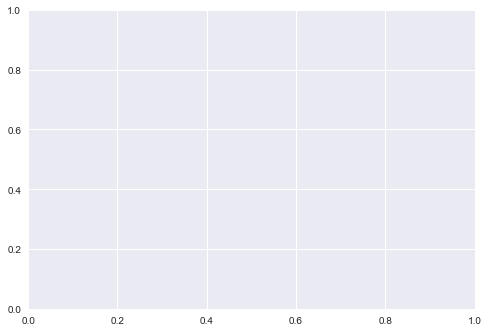

In [62]:
get_linear_model_metrics(X,result['FullyFunded'],loan_model)

In [66]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

X = result[['residence_rent_or_own','loan_duration','fico_mean','FullyFunded']].dropna()
y = X['FullyFunded']
X.drop('FullyFunded', axis=1, inplace=True)
    
    
# Fits the model
model.fit(X, y)

# Helper function to visualize Decision Trees (creates a file tree.png)

from sklearn.tree import export_graphviz
from os import system 
def build_tree_image(model):
    dotfile = open("tree.dot", 'w')
    export_graphviz(model,
    out_file = dotfile,
    feature_names = X.columns)
    dotfile.close()
    system("dot -Tpng tree.dot -o tree.png")
    
build_tree_image(model)